#### In this project, we will train several classification models (Logistic, SVM, KNN and Random Forest classifier) to predict the churn rate of a Telecom customers.

* Telecom service providers use customer attrition as one of their business metrics because the cost of retaining an existing customer is far less than acquiring a new customer.
* ML algorithms helo companies analyze customer attrition rate based on severl factors which includes various services subscribe d by the customers, tenure rate, gender, senior citizen and payment method etc.

**Let's import required libraries and dataset.**

In [2]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline()
init_notebook_mode(connected=True)  # To connect Jupyter notebook with JavaScript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
#Read the dataset
telecom_df = pd.read_csv("telecom_churn.csv")

In [4]:
#top 5 records

In [5]:
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
#check the shape of the dataset
telecom_df.shape

(5000, 21)

In [8]:
#check all column names
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [9]:
#summary of the data
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [10]:
#crosscheck null values
telecom_df.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
class                            0
dtype: int64

In [11]:
#some statistics
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


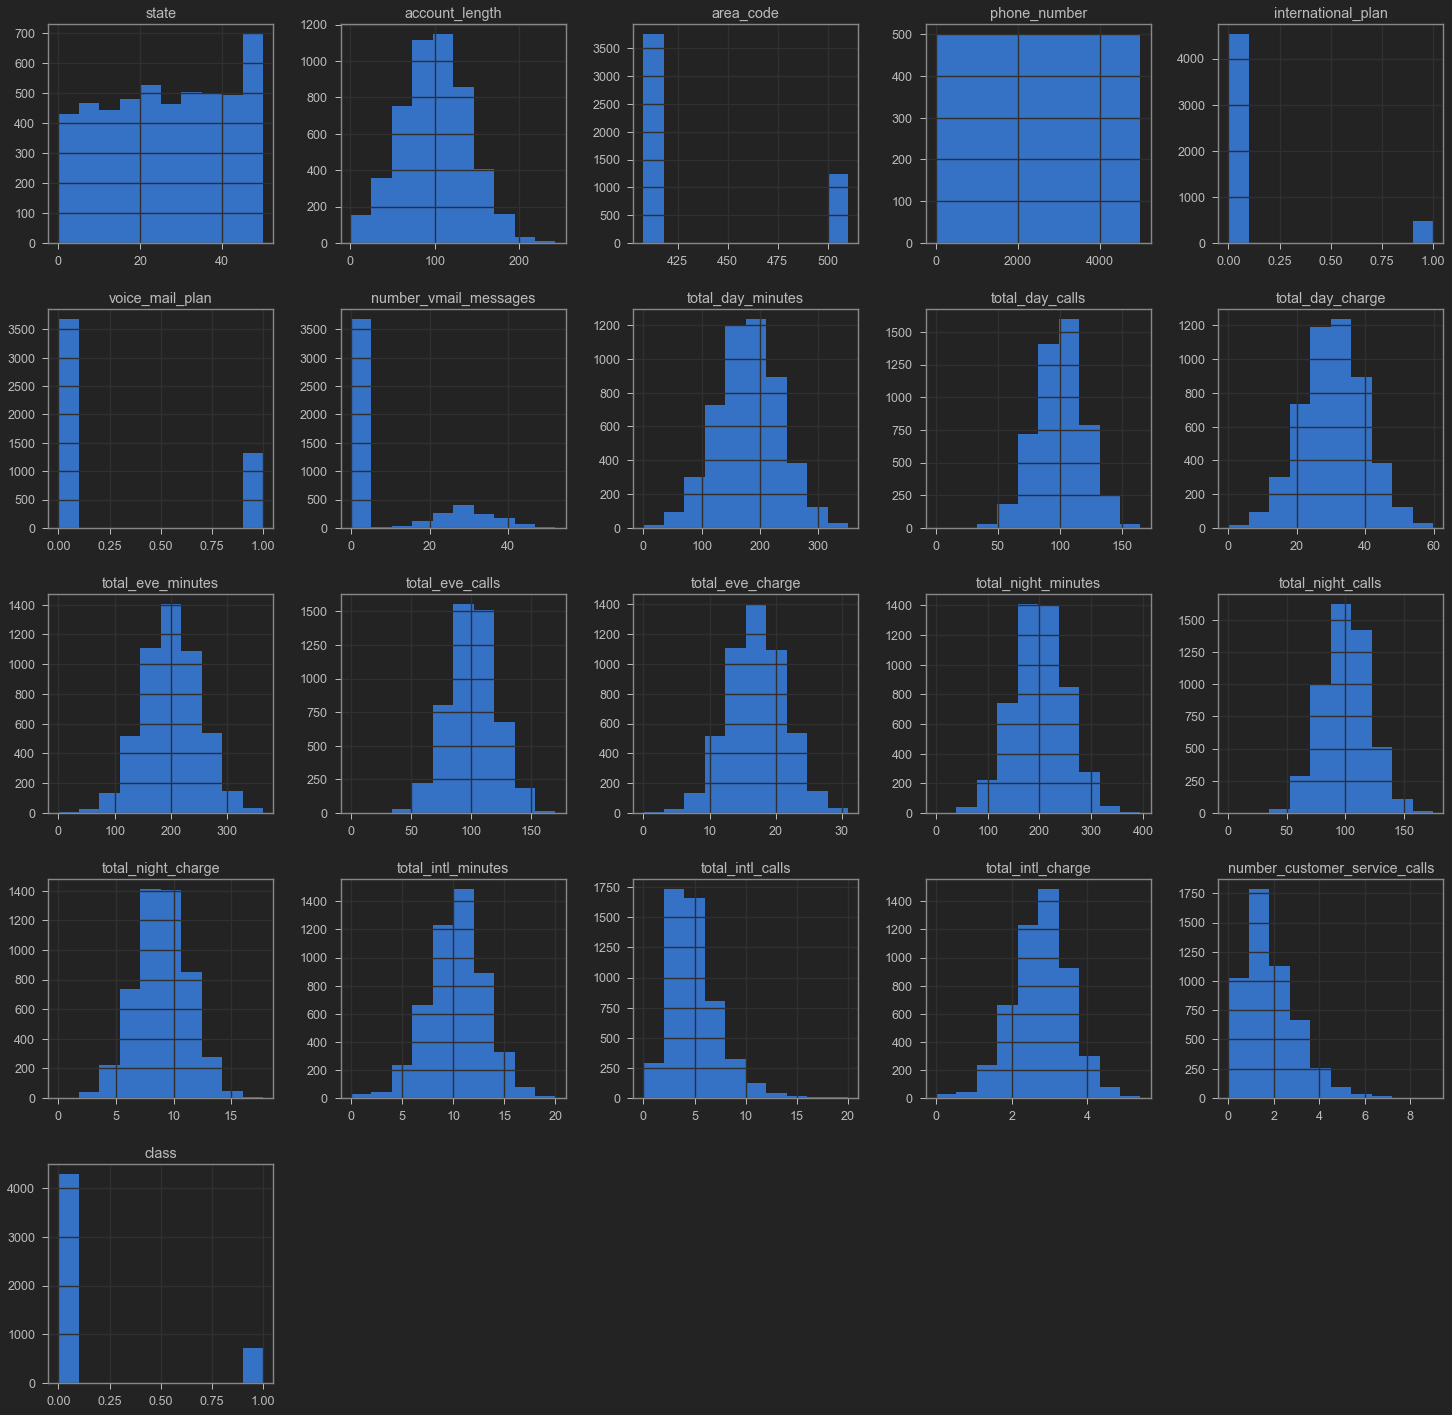

In [12]:
##Some Graphs
telecom_df.hist(figsize=(25,25))
plt.show()

In [15]:
telecom_df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [20]:
#Plot the pie chart to get the information about the % of the telecom customers churning using plotly

import plotly.graph_objects as go
fig = go.Figure(data = [ go.Pie(labels = ['Retained (0)','Exited (1)'], 
                                values = telecom_df['class'].value_counts())])
fig.show()

In [21]:
telecom_df['international_plan'].value_counts()

0    4527
1     473
Name: international_plan, dtype: int64

In [22]:
fig2 = go.Figure(data = [go.Pie(labels = ['Without International Plan','With International Plan'],
                              values = telecom_df['international_plan'].value_counts())])
fig2.show()

In [23]:
##plot histogram for the internationaln plan service
fig3 = px.histogram(telecom_df, x= 'international_plan', color = 'class')
fig3.show()

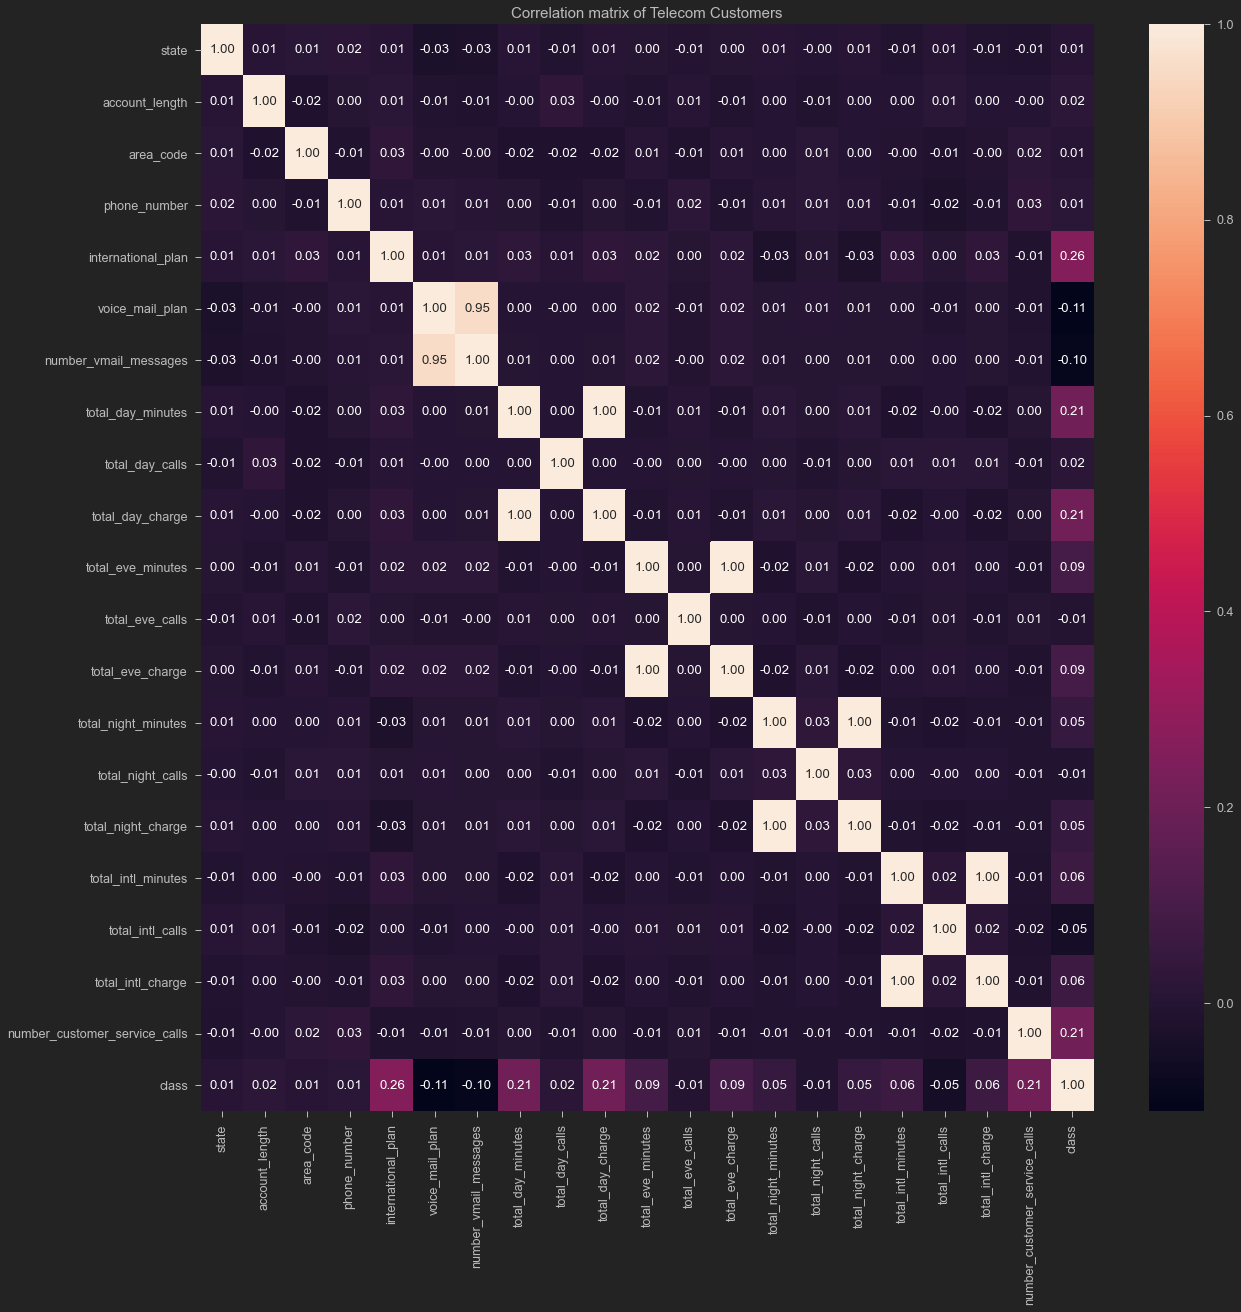

In [24]:
#Correlation Matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title("Correlation matrix of Telecom Customers", fontsize=15)
plt.show()

### It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
### It is clearly shown that "total_day_charge" and "total_day_minutes" are highly correlated.

Text(0.5, 1.0, 'Distribution of Day charges by Churn')

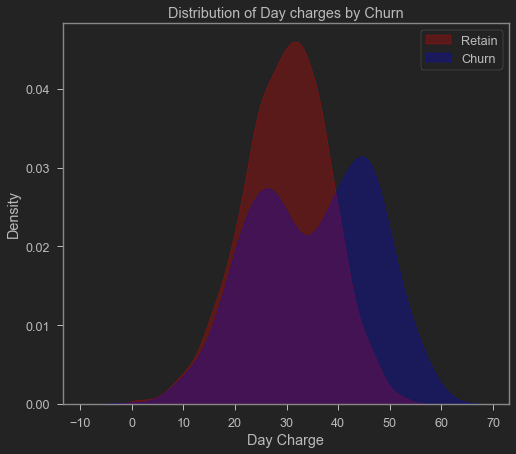

In [28]:
##Churn by day charges
ax= sns.kdeplot(telecom_df.total_day_charge[telecom_df['class']==0],
               color ="Red", shade=True)
ax= sns.kdeplot(telecom_df.total_day_charge[telecom_df['class']==1],
               color ='Blue', shade= True)

ax.legend(['Retain', 'Churn'], loc= "upper right")
ax.set_xlabel("Day Charge")
ax.set_ylabel("Density")
ax.set_title("Distribution of Day charges by Churn")

Text(0.5, 1.0, 'Distribution of evening charged by churn')

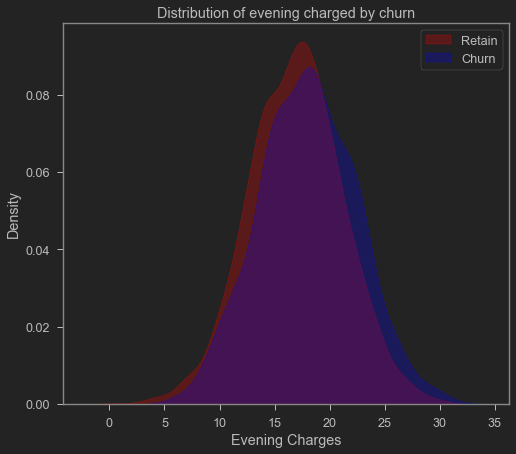

In [29]:
##Churn by evening charges
ax1=sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class']==0)],
               color ="Red", shade=True)
ax1=sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"]==1)],
               color ="Blue", shade = True)
ax1.legend(["Retain","Churn"], loc ="upper right")
ax1.set_xlabel("Evening Charges")
ax1.set_ylabel("Density")
ax1.set_title("Distribution of evening charged by churn")

In [30]:
## plotly histogram on voice mail plan correlated with Churn feature

In [31]:
fig4=px.histogram(telecom_df, x='voice_mail_plan', color ='class')
fig4.show()

### Identify the important features and prepare data before training the model

* Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data.Therefore, finding and selecting the most useful features in the dataset is crucial. Assigning input features to **X** and output (Churn) to **y**

In [32]:
X= telecom_df.drop(["class","area_code","phone_number"], axis="columns") ##area_code and phone_number both columns are irrelevant for considering in model training so we are removing both columns
y=telecom_df["class"]

In [33]:
X.shape

(5000, 18)

In [34]:
y.shape

(5000,)

In [35]:
##Perform Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [38]:
##crosschecking whether split was successfull or not
X_train.shape

(3500, 18)

In [39]:
X_test.shape

(1500, 18)

In [40]:
y_train.shape

(3500,)

In [41]:
y_test.shape

(1500,)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

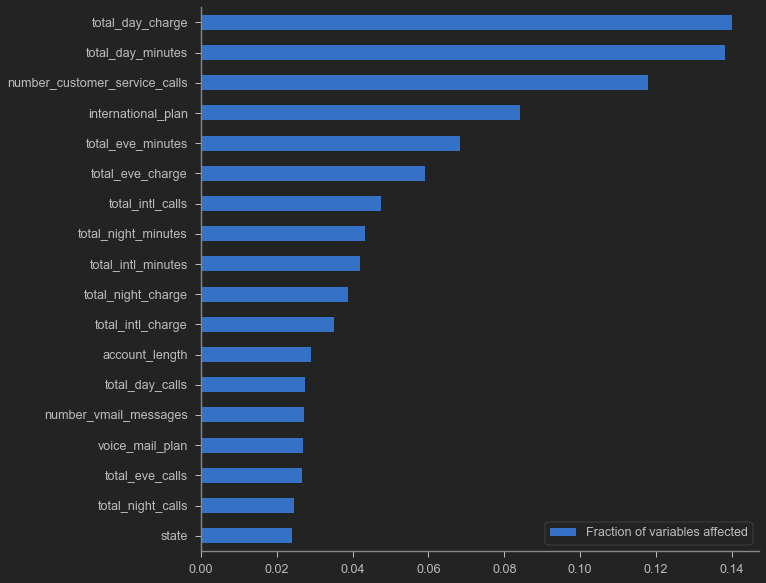

In [46]:
## Plot the feature importance
feat_scores = pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_ }, index= X.columns)
feat_scores = feat_scores.sort_values(by= "Fraction of variables affected")
feat_scores.plot(kind="barh", figsize=(10,10))
sns.despine()

### The above graph is generated by Random Forest algorithm and The graph indicates that "total_day_charge" tops the list of important features followed by "total_day_minutes" and so on.

## 1. Logistic Regression 

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [49]:
y_predict=model_LR.predict(X_test)

In [50]:
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.

In [51]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1304
           1       0.51      0.11      0.18       196

    accuracy                           0.87      1500
   macro avg       0.70      0.55      0.56      1500
weighted avg       0.83      0.87      0.83      1500



<AxesSubplot:>

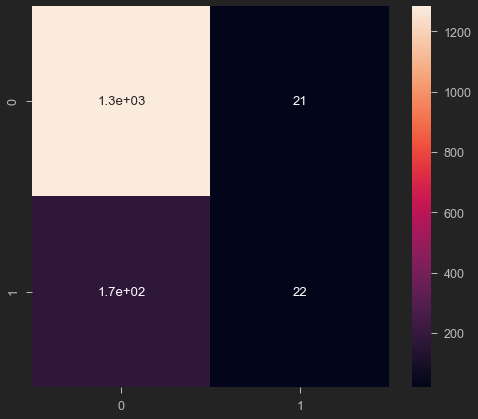

In [52]:
##confusion matrix
cm= confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

## 2. Support Vector Machine 

In [53]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

In [63]:
model_svm = LinearSVC(max_iter=10000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)

C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [64]:
y_predict=model_svm.predict(X_test)

In [65]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1304
           1       0.47      0.14      0.21       196

    accuracy                           0.87      1500
   macro avg       0.68      0.56      0.57      1500
weighted avg       0.83      0.87      0.83      1500



<AxesSubplot:>

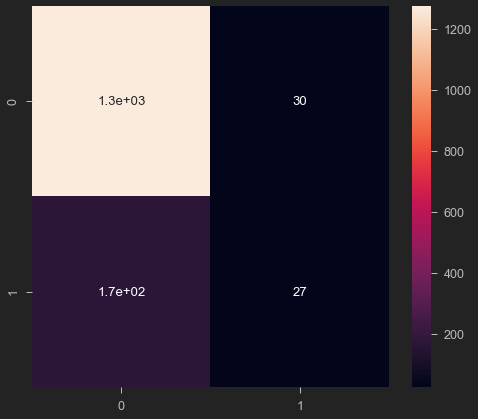

In [66]:
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

## 3. Random Forest Classifier 

In [67]:
from sklearn.ensemble import RandomForestClassifier


In [69]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [70]:
y_predict=model_rf.predict(X_test)

In [71]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1304
           1       0.93      0.77      0.84       196

    accuracy                           0.96      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500



<AxesSubplot:>

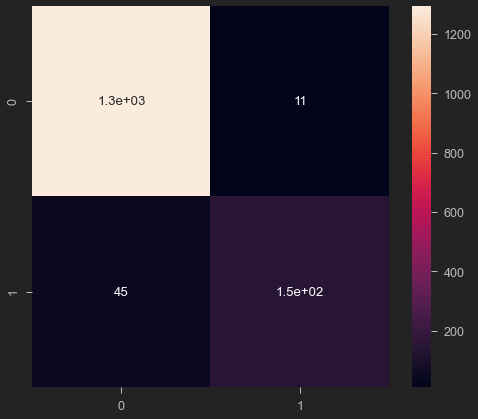

In [72]:
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

## 4. K'th-Nearest Neighbors (KNN) 

In [73]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [74]:
y_predict=model_knn.predict(X_test)

In [75]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1304
           1       0.76      0.32      0.45       196

    accuracy                           0.90      1500
   macro avg       0.83      0.65      0.70      1500
weighted avg       0.89      0.90      0.88      1500



<AxesSubplot:>

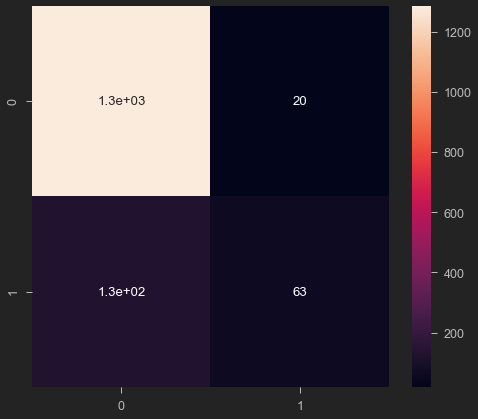

In [76]:
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

## 5. Naive Bayes Classifier

In [77]:
from sklearn.naive_bayes import GaussianNB


In [78]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [80]:
y_predict=model_gnb.predict(X_test)

In [81]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1304
           1       0.54      0.60      0.57       196

    accuracy                           0.88      1500
   macro avg       0.74      0.76      0.75      1500
weighted avg       0.89      0.88      0.88      1500



<AxesSubplot:>

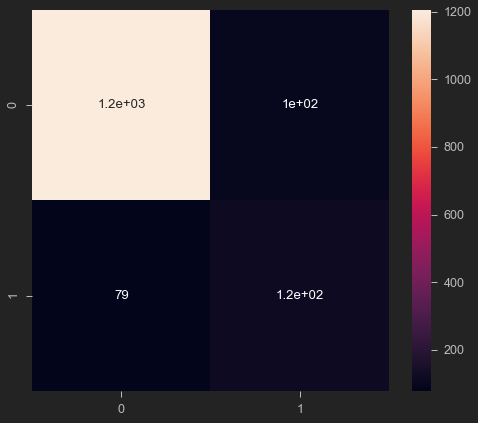

In [82]:
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

### * Plot the ROC (Receiver Operating Characteristic) Curves for all 5 models and AUC (Area Under the Curve) Scores 

In [83]:
model_LR.predict_proba(X_test)

array([[0.85407083, 0.14592917],
       [0.89748221, 0.10251779],
       [0.828967  , 0.171033  ],
       ...,
       [0.53018398, 0.46981602],
       [0.8651816 , 0.1348184 ],
       [0.92659857, 0.07340143]])

In [84]:
model_LR.predict_proba(X_test)[:,1]

array([0.14592917, 0.10251779, 0.171033  , ..., 0.46981602, 0.1348184 ,
       0.07340143])

In [86]:
y_test

794     0
3209    1
80      0
362     0
621     0
       ..
232     0
4090    0
354     1
1894    0
2712    0
Name: class, Length: 1500, dtype: int64

In [87]:
from sklearn.metrics import roc_curve

In [88]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1], pos_label=1)

In [89]:
fpr1

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.66871166e-04,
       7.66871166e-04, 3.83435583e-03, 3.83435583e-03, 6.90184049e-03,
       6.90184049e-03, 1.22699387e-02, 1.22699387e-02, 1.30368098e-02,
       1.30368098e-02, 1.45705521e-02, 1.45705521e-02, 1.84049080e-02,
       1.84049080e-02, 2.14723926e-02, 2.14723926e-02, 2.22392638e-02,
       2.22392638e-02, 2.53067485e-02, 2.53067485e-02, 2.76073620e-02,
       2.76073620e-02, 2.83742331e-02, 2.83742331e-02, 3.06748466e-02,
       3.06748466e-02, 3.29754601e-02, 3.29754601e-02, 3.91104294e-02,
       3.91104294e-02, 4.29447853e-02, 4.29447853e-02, 4.52453988e-02,
       4.52453988e-02, 4.83128834e-02, 4.83128834e-02, 4.98466258e-02,
       4.98466258e-02, 5.06134969e-02, 5.06134969e-02, 5.13803681e-02,
       5.13803681e-02, 5.98159509e-02, 5.98159509e-02, 6.13496933e-02,
       6.13496933e-02, 6.21165644e-02, 6.21165644e-02, 6.44171779e-02,
       6.44171779e-02, 6.51840491e-02, 6.51840491e-02, 6.67177914e-02,
      

In [90]:
tpr1

array([0.        , 0.00510204, 0.02040816, 0.02040816, 0.03571429,
       0.03571429, 0.04591837, 0.04591837, 0.05102041, 0.05102041,
       0.06632653, 0.06632653, 0.09693878, 0.09693878, 0.1122449 ,
       0.1122449 , 0.11734694, 0.11734694, 0.12755102, 0.12755102,
       0.1377551 , 0.1377551 , 0.14285714, 0.14285714, 0.14795918,
       0.14795918, 0.15816327, 0.15816327, 0.16326531, 0.16326531,
       0.17346939, 0.17346939, 0.17857143, 0.17857143, 0.18367347,
       0.18367347, 0.18877551, 0.18877551, 0.19387755, 0.19387755,
       0.19897959, 0.19897959, 0.20918367, 0.20918367, 0.2244898 ,
       0.2244898 , 0.22959184, 0.22959184, 0.23469388, 0.23469388,
       0.23979592, 0.23979592, 0.24489796, 0.24489796, 0.25510204,
       0.25510204, 0.26020408, 0.26020408, 0.26530612, 0.26530612,
       0.28061224, 0.28061224, 0.29081633, 0.29081633, 0.29591837,
       0.29591837, 0.30102041, 0.30102041, 0.32142857, 0.32142857,
       0.32653061, 0.32653061, 0.33163265, 0.33163265, 0.34183

In [92]:
thresh1

array([1.91248174, 0.91248174, 0.74566863, 0.73949058, 0.6992885 ,
       0.66786183, 0.6407362 , 0.61205104, 0.59805811, 0.5734493 ,
       0.55576481, 0.55134333, 0.53178766, 0.5227565 , 0.51154226,
       0.49091388, 0.4898856 , 0.47410108, 0.46981602, 0.46949662,
       0.46399132, 0.45482182, 0.4436044 , 0.43776237, 0.43411561,
       0.43346481, 0.43163026, 0.42918958, 0.42779531, 0.41957492,
       0.41588564, 0.40224266, 0.40181233, 0.39408595, 0.39243665,
       0.38944822, 0.38905142, 0.38776774, 0.38708627, 0.38583884,
       0.38576946, 0.38568104, 0.38130865, 0.38027686, 0.37747187,
       0.36506605, 0.36390151, 0.36298477, 0.36277665, 0.36246229,
       0.36181471, 0.34953211, 0.34924603, 0.34769626, 0.34644323,
       0.33869229, 0.33838228, 0.33634166, 0.33624803, 0.32915043,
       0.32410643, 0.32291902, 0.32260964, 0.32001374, 0.31990361,
       0.31750095, 0.31723746, 0.31547644, 0.31116391, 0.3100644 ,
       0.30983892, 0.30982507, 0.3092483 , 0.30743132, 0.30711

In [93]:
##ROC Curve
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label= 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label= 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label= 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label= 1)

In [95]:
#AUC Score
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:,1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:,1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:,1])


print("Logistic Regression :", auc_score1)
print("Support Vector Machine :", auc_score2)
print("Random Forest :", auc_score3)
print("K-Nearest Neighbors: ", auc_score4)
print("Naive Bayes: ", auc_score5)

Logistic Regression : 0.7428790534618754
Support Vector Machine : 0.8240343683485665
Random Forest : 0.9248074996869914
K-Nearest Neighbors:  0.6809561631401027
Naive Bayes:  0.8542749154876675


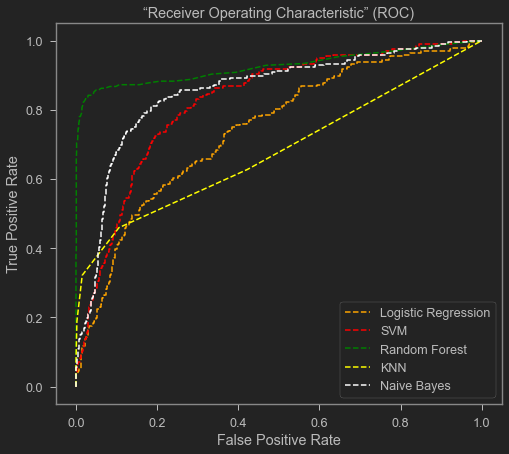

In [103]:
##Lets Plot the Curves

plt.plot(fpr1, tpr1, linestyle = '--', color = "orange", label="Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = '--', color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = '--', color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = '--', color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = '--', color = "white", label = "Naive Bayes")


plt.title("“Receiver Operating Characteristic” (ROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "best")
plt.show()

### The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

In [104]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1304
           1       0.93      0.77      0.84       196

    accuracy                           0.96      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500



In [108]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_predict)

Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: 96% label accuracy
2. Precision: 97% labeled as Retained customers and 93% labeled as churned customers
3. Recall: 99% labeled as Retained customers and 77% labeled as churned customers

* Note: We can improve this model even more better by using "Grid Search" method.

* Grid Search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/